In [1]:
!pip install textblob
!pip install tweepy

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.5.zip (1.4 MB)
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434681 sha256=10ba6709dce84e40488bf324a983c2da367ef5456d0e18425c3a757df24adb54
  Stored in directory: c:\users\hp pc\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [3]:
!pip install pycountry

  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746867 sha256=2895c9f84f354558c4bdf1d05ec97c819b3ba4ffcd1bcde1d90fdbda6893b176
  Stored in directory: c:\users\hp pc\appdata\local\pip\cache\wheels\09\eb\0d\4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry


In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Authentication
consumerKey = 'Consumer Key'
consumerSecret = 'Consumer secret key'
accessToken = 'access token key'
accessTokenSecret = 'access token secret key'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: farmers protest india
Please enter how many tweets to analyze: 2000


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  390
negative number:  1041
neutral number:  569


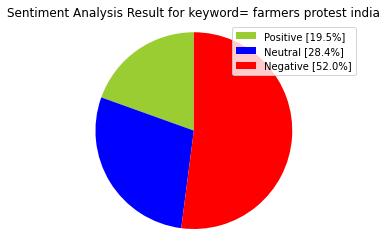

In [5]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [6]:
tweet_list

,0
0,RT @vijaypks51: Feku Besharam Feku Besharam.\n...
1,"RT @ArchisMohan: ""current struggle should not ..."
2,"RT @NcAsthana: Bhakts are talking of plot to ""..."
3,RT @thewire_in: “If highlighting farmers’ prot...
4,RT @news24tvchannel: Farmers Protest: किसान आं...
...,...
1995,RT @rohanrgupta: 248 farmers have lost their l...
1996,RT @ABPNews: #RakeshTikait का #NarendraTomar क...
1997,RT @ABPNews: #RakeshTikait का #NarendraTomar क...
1998,"RT @mvmeet: Times of India headline:\n\n""Punja..."


In [7]:
tweet_list.drop_duplicates(inplace = True)

In [8]:
tweet_list

,0
0,RT @vijaypks51: Feku Besharam Feku Besharam.\n...
1,"RT @ArchisMohan: ""current struggle should not ..."
2,"RT @NcAsthana: Bhakts are talking of plot to ""..."
3,RT @thewire_in: “If highlighting farmers’ prot...
4,RT @news24tvchannel: Farmers Protest: किसान आं...
...,...
1952,"RT @ColumbiaJournMA: For @FRANCE24, @ColumbiaJ..."
1969,@Roopgur07 @farmer3630 I am not saying “Sikha ...
1975,(Support for India's farmers spreads) (https:/...
1979,Around 250 farmers have been died during the p...


In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
killpunctuation = str.maketrans('', '', r"-()\"#/@;:<>{}-=~|.?,")
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: x.translate(killpunctuation)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @vijaypks51: Feku Besharam Feku Besharam.\n...,feku besharam feku besharam\nthis farmers pro...
1,"RT @ArchisMohan: ""current struggle should not ...",current struggle should not be regarded as a ...
2,"RT @NcAsthana: Bhakts are talking of plot to ""...",bhakts are talking of plot to defame india th...
3,RT @thewire_in: “If highlighting farmers’ prot...,“if highlighting farmers’ protest globally is...
4,RT @news24tvchannel: Farmers Protest: किसान आं...,farmers protest किसान आंदोलन का 90वां दिन आज ...
5,RT @gulf_news: #FarmersProstests: #India’s #Ja...,farmersprostests india’s jats may be finally ...
6,RT @Magnum__girl: After witnessing the widespr...,after witnessing the widespread resentment th...
7,RT @poopsy1971: If you call yourself a Sikh an...,if you call yourself a sikh and support fake ...
8,"RT @ChalecosAmarill: 🛑In #India more than 100,...",🛑in india more than 100000 farmers gathered i...
9,RT @aartic02: 1907 ; #Farmers stood against La...,1907 farmers stood against laws by british t...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @vijaypks51: Feku Besharam Feku Besharam.\n...,feku besharam feku besharam\nthis farmers pro...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
1,"RT @ArchisMohan: ""current struggle should not ...",current struggle should not be regarded as a ...,0.000000,0.400000,negative,NaN,NaN,NaN,NaN
2,"RT @NcAsthana: Bhakts are talking of plot to ""...",bhakts are talking of plot to defame india th...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
3,RT @thewire_in: “If highlighting farmers’ prot...,“if highlighting farmers’ protest globally is...,0.240000,0.400000,positive,NaN,NaN,NaN,NaN
4,RT @news24tvchannel: Farmers Protest: किसान आं...,farmers protest किसान आंदोलन का 90वां दिन आज ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
5,RT @gulf_news: #FarmersProstests: #India’s #Ja...,farmersprostests india’s jats may be finally ...,0.033333,0.766667,positive,NaN,NaN,NaN,NaN
6,RT @Magnum__girl: After witnessing the widespr...,after witnessing the widespread resentment th...,-0.025000,0.100000,negative,NaN,NaN,NaN,NaN
7,RT @poopsy1971: If you call yourself a Sikh an...,if you call yourself a sikh and support fake ...,-0.600000,0.966667,negative,NaN,NaN,NaN,NaN
8,"RT @ChalecosAmarill: 🛑In #India more than 100,...",🛑in india more than 100000 farmers gathered i...,0.500000,0.500000,negative,NaN,NaN,NaN,NaN
9,RT @aartic02: 1907 ; #Farmers stood against La...,1907 farmers stood against laws by british t...,0.300000,0.500000,neutral,0.0,1.0,0.0,0.0


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [14]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')


,Total,Percentage
negative,160,46.65
neutral,109,31.78
positive,74,21.57


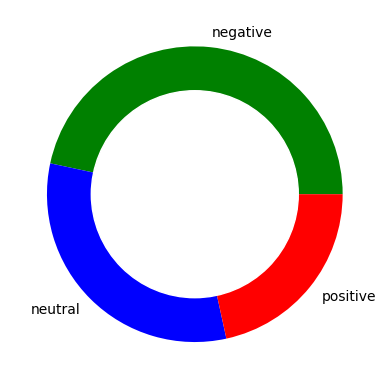

In [15]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [21]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('cloud2.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


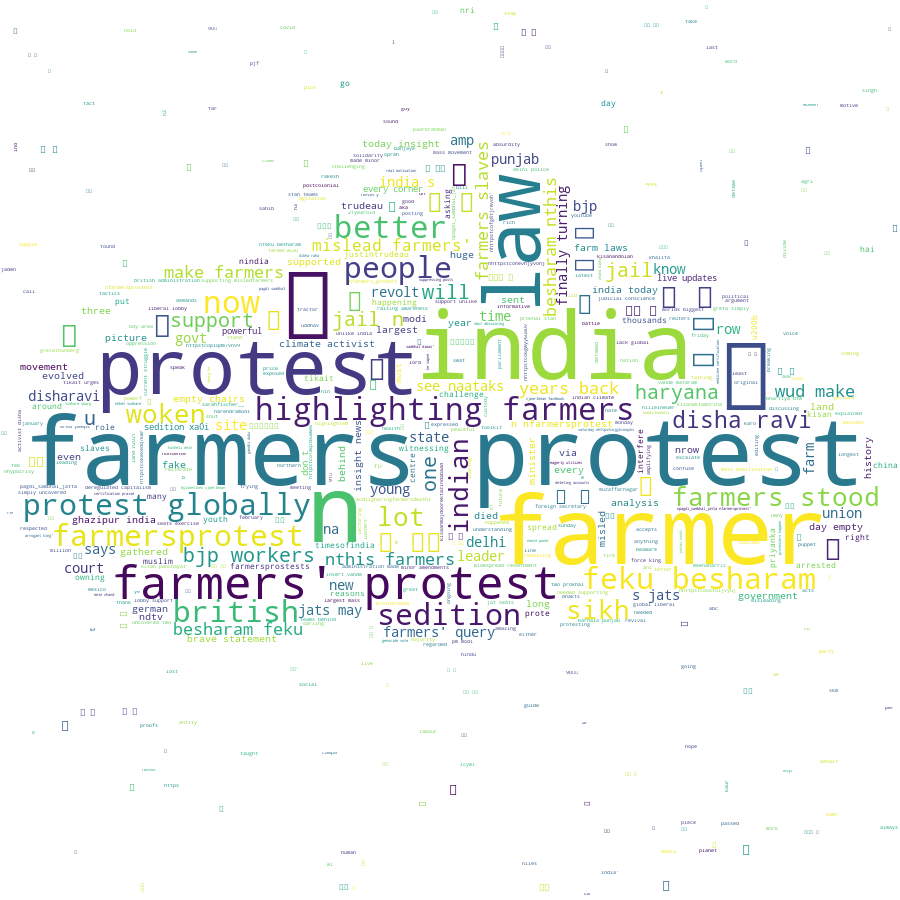

In [22]:
create_wordcloud(tw_list['text'].values)